In [3]:
import numpy as np
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
import random

In [6]:
# Delta of a call option
def get_delta_call(T,r,d,S0,K,sigma):
    d1 = (np.log(S0/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    delta= np.exp(-d*T)*norm.cdf(d1)
    return delta

In [7]:
get_delta_call(1,0,0,100,110,0.5)

0.5236751354724235

In [8]:
# Gamma of a call option
def get_gamma_call(T,r,d,S0,K,sigma):
    d1 = (np.log(S0/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    gamma= (np.exp(-d*T))/(S0*sigma*np.sqrt(T))*norm.pdf(d1)
    return gamma

In [9]:
get_gamma_call(1,0,0,100,110,0.5)

0.00796479152793977

In [10]:
# vega of a call option
def get_vega_call(T,r,d,S0,K,sigma):
    d1 = (np.log(S0/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    vega = S0*np.exp(-d*T)*np.sqrt(T)*norm.pdf(d1)
    return vega

In [11]:
get_vega_call(1,0,0,100,110,0.5)

39.823957639698854

In [12]:
# Rho of a call option
def get_rho_call(T,r,d,S0,K,sigma):
    d1 = (np.log(S0/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    rho=K*T* np.exp(-r*T)*norm.cdf(d2)
    return rho

In [13]:
get_rho_call(1,0,0,100,110,0.5)

36.27183235267212

In [19]:
# Theta of a call option
def get_theta_call(T,r,d,S0,K,sigma):
    d1 = (np.log(S0/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    theta= (1/T)*((-1*((S0*sigma*np.exp(-d*T)*norm.pdf(d1))/2*np.sqrt(T)))-r*K*np.exp(-r*T)+d*S0*np.exp(-d*T)*norm.cdf(d1))
    return theta

In [20]:
get_theta_call(1,0,0,100,110,0.5)

-9.955989409924713

In [27]:
# Price of Call Option function
def get_call( T, r, d, S0,K, sigma):
    if K==0 or T==0 or sigma ==0:
        print('Not a valid input')
    elif d == 0:
        d1 = (np.log(S0/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)

        call = S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
        print(call)
        return call
    elif d < 0:
        print('Not a valid dividend input')
    else:
        d1 = (np.log(S0/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)

        call = np.exp(-d*T)*S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
        print(call)
        return(call)

In [28]:
get_call(1,0,0,100,110,0.5)

16.095681194570233


16.095681194570233

In [39]:
# Testing delta
eps=0.0000001
dBS = (1/eps)*(get_call(1,0,0,100+eps,110,0.5) - get_call(1,0,0,100,110,0.5))
delta = get_delta_call(1,0,0,100,110,0.5)
if np.abs(delta-dBS)<.001:
    print("Code works because delta is derivative and you are using limit  definition of derivative when epsilon gets really close to 0")
else:
    print('Soph messed up code')
print (np.abs(delta-dBS))

16.09568124693775
16.095681194570233
Code works because delta is derivative and you are using limit  definition of derivative when epsilon gets really close to 0
4.774474138269369e-08


In [36]:
# Testing gamma - finite difference deltas
eps=0.0000001
ddel = (1/eps)*(get_delta_call(1,0,0,100+eps,110,0.5) - get_delta_call(1,0,0,100,110,0.5))
gamma = get_gamma_call(1,0,0,100,110,0.5)
if np.abs(gamma-ddel)<.001:
    print("Code works", ddel, gamma)
else:
    print('Soph messed up code')
print (np.abs(gamma-ddel))

Code works 0.00796479215914303 0.00796479152793977
6.312032597988182e-10


In [42]:
# Testing vega - finite difference BS change in vol
eps=0.0000001
dBSvol = (1/eps)*(get_call(1,0,0,100,110,0.5+eps) - get_call(1,0,0,100,110,0.5))
vega = get_vega_call(1,0,0,100,110,0.5)
if np.abs(vega-dBSvol)<.001:
    print("Code works",'dBSVol', dvol, 'vega', vega)
else:
    print('Soph messed up code')
print (np.abs(vega-dBSvol))

16.095685176965986
16.095681194570233
Code works dBSVol 39.82395753610035 vega 39.823957639698854
1.0359850222130262e-07


In [46]:
# Testing rho - finite difference BS change in rho
eps=0.0000001
dBSrho = (1/eps)*(get_call(1,0+eps,0,100,110,0.5) - get_call(1,0,0,100,110,0.5))
rho = get_rho_call(1,0,0,100,110,0.5)
if np.abs(rho-dBSrho)<.001:
    print("Code works",'dBSrho', dBSrho, 'rho', rho)
else:
    print('Soph messed up code')
print (np.abs(rho-dBSrho))

16.095684821753686
16.095681194570233
Code works dBSrho 36.27183453147609 rho 36.27183235267212
2.178803967467502e-06


In [53]:
# Testing theta - finite difference BS change in theta
eps=0.0000001
dBStheta = (-1)*(1/eps)*(get_call(1+eps,0,0,100,110,0.5) - get_call(1,0,0,100,110,0.5))
theta = get_theta_call(1,0,0,100,110,0.5)
if np.abs(theta-dBStheta)<.001:
    print("Code works",'dBStheta', dBStheta, 'theta', theta)
else:
    print('Soph messed up code')
print (np.abs(theta-dBStheta))


16.095682190169143
16.095681194570233
Code works dBStheta -9.955989099807994 theta -9.955989409924713
3.1011671985936573e-07


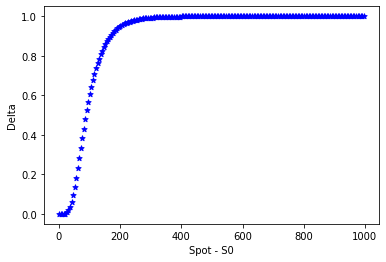

In [55]:
#graph delta with respect to spot strike = 100
spot_list=[]
delta_list=[]
for i in range (1,1000,5):
    delta = get_delta_call(1,0,0,i,100,0.5)
    delta_list.append(delta)
for j in range (1,1000,5):
    spot_list.append(j)

for q in range(0,len(delta_list)):
    x1=[spot_list[q]]
    y1= [delta_list[q]]
    plt.scatter(x1,y1, label = "stars", color= "blue", marker = "*", s = 30)

plt.xlabel('Spot - S0')
plt.ylabel('Delta')
plt.show()


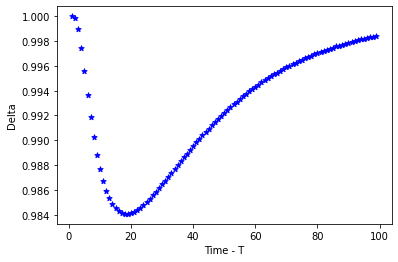

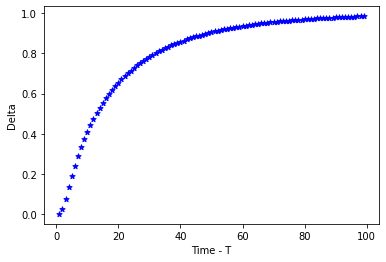

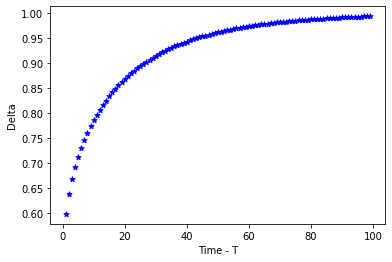

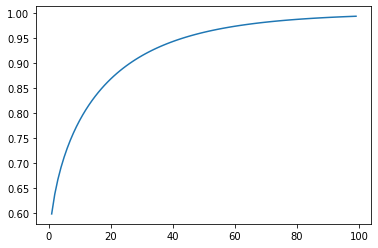

In [112]:
#graph delta as functino of time for ITM OTM ATM

#ITM spot = 100 K = 10
time_list=[]
delta_list=[]
for i in range (1,100):
    delta = get_delta_call(i,0,0,100,10,0.5)
    delta_list.append(delta)
for j in range (1,100):
    time_list.append(j)

for q in range(0,len(delta_list)):
    x1=[time_list[q]]
    y1= [delta_list[q]]
    plt.scatter(x1,y1, label = "stars", color= "blue", marker = "*", s = 30)

plt.xlabel('Time - T')
plt.ylabel('Delta')
plt.show()

#OTM spot = 100 K = 500
time_list=[]
delta_list=[]
for i in range (1,100):
    delta = get_delta_call(i,0,0,100,500,0.5)
    delta_list.append(delta)
for j in range (1,100):
    time_list.append(j)

for q in range(0,len(delta_list)):
    x1=[time_list[q]]
    y1= [delta_list[q]]
    plt.scatter(x1,y1, label = "stars", color= "blue", marker = "*", s = 30)

plt.xlabel('Time - T')
plt.ylabel('Delta')
plt.show()

#ATM spot = 100 K = 100
time_list=[]
delta_list=[]
for i in range (1,100):
    delta = get_delta_call(i,0,0,100,100,0.5)
    delta_list.append(delta)
for j in range (1,100):
    time_list.append(j)

for q in range(0,len(delta_list)):
    x1=[time_list[q]]
    y1= [delta_list[q]]
    plt.scatter(x1,y1, label = "stars", color= "blue", marker = "*", s = 30)

plt.xlabel('Time - T')
plt.ylabel('Delta')
plt.show()


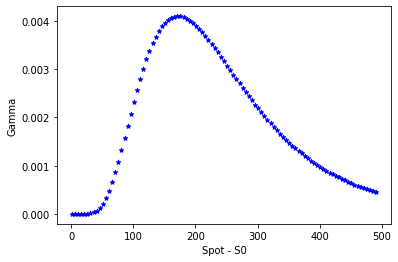

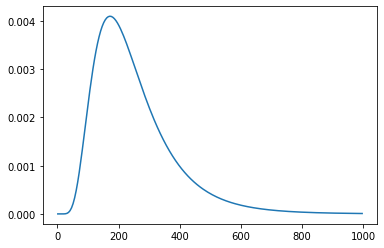

In [111]:
#graph gamma with respect to spot strike = 100
spot_list=[]
gamma_list=[]
for i in range (1,1000,5):
    gamma = get_gamma_call(1,0,0,i,250,0.5)
    gamma_list.append(gamma)
for j in range (1,1000,5):
    spot_list.append(j)

for q in range(0,len(delta_list)):
    x1=[spot_list[q]]
    y1= [gamma_list[q]]
    plt.scatter(x1,y1, label = "stars", color= "blue", marker = "*", s = 20)

plt.xlabel('Spot - S0')
plt.ylabel('Gamma')
plt.show()

plt.plot(spot_list, gamma_list)

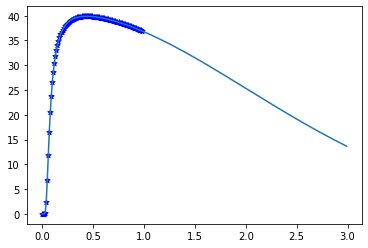

In [110]:
#graph vega with respect to vol
sigma_list=[]
vega_list=[]
for i in np.arange(0.00001,3,.01):
    vega = get_vega_call(1,0,0,100,110,i)
    vega_list.append(vega)
    
for j in np.arange(0.00001,3,.01):
    sigma_list.append(j)

for q in range(0,len(delta_list)):
    x1=[sigma_list[q]]
    y1= [vega_list[q]]
    plt.scatter(x1,y1, label = "stars", color= "blue", marker = "*", s = 30)

plt.plot(sigma_list, vega_list)

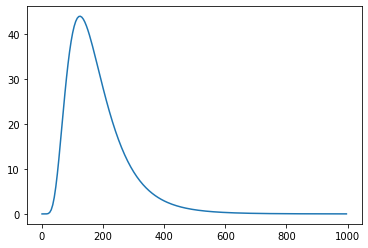

In [119]:
#graph vega with respect to spot
spot_list=[]
vega_list=[]
for i in np.arange(1,1000,5):
    vega = get_vega_call(1,0,0,i,110,0.5)
    vega_list.append(vega)
    
for j in np.arange(1,1000,5):
    spot_list.append(j)

plt.plot(spot_list, vega_list)

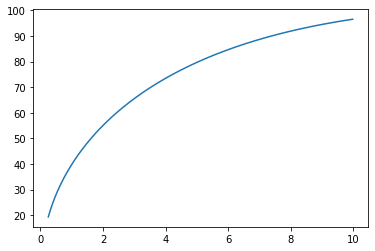

In [127]:
#graph vega with respect to time
time_list=[]
vega_list=[]
for i in np.arange(0.25,10,.025):
    vega = get_vega_call(i,0,0,100,110,0.5)
    vega_list.append(vega)
    
for j in np.arange(0.25,10,.025):
    time_list.append(j)

plt.plot(time_list, vega_list)